In [ ]:
#treinando usando ds voltado pra area da saude 


import pandas as pd
import seaborn as sns
import sklearn as sks 
import numpy as np

In [3]:
heart_df=pd.read_csv("C:/Users/viana/OneDrive/Documentos/dados-e-mais-dados/heart/heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
heart_df.index=range(heart_df.shape[0])
heart_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
renomear = {'age':'idade', 
'sex':'sexo', 
'cp':'dor_no_peito', 
'trestbps':'pressao_arterial_repouso', 
'chol':'colesterol', 
'fbs':'acucar_sange_jejum', 
'restecg':'eletrocadio_repouso', 
'thalach':'freq_card_max',
'exang':'angina_exercicios', 
'oldpeak':'pico_antigo',
'slope':'pico_exercico_slope',
'ca':'numero_vasos_principais',
'thal':'thal',
'target':'target'}

In [42]:
heart_df.rename(columns=renomear, inplace=True)

# legenda do df #

acucar_sange_jejum > 120 mg/dl
eletrocadio_repouso (values 0,1,2)
numero_vasos_principais (0-3)
thal  3 = normal; 6 = fixed defect; 7 = reversable defect


In [43]:
heart_df

,idade,sexo,dor_no_peito,pressao_arterial_repouso,colesterol,acucar_sange_jejum,eletrocadio_repouso,freq_card_max,angina_exercicios,pico_antigo,pico_exercico_slope,numero_vasos_principais,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
heart_df.sexo.value_counts(normalize = True) * 100

1    68.316832
0    31.683168
Name: sexo, dtype: float64

In [51]:
heart_df.idade.min()

29

In [52]:
heart_df.describe()

,idade,sexo,dor_no_peito,pressao_arterial_repouso,colesterol,acucar_sange_jejum,eletrocadio_repouso,freq_card_max,angina_exercicios,pico_antigo,pico_exercico_slope,numero_vasos_principais,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     303 non-null    int64  
 1   sexo                      303 non-null    int64  
 2   dor_no_peito              303 non-null    int64  
 3   pressao_arterial_repouso  303 non-null    int64  
 4   colesterol                303 non-null    int64  
 5   acucar_sange_jejum        303 non-null    int64  
 6   eletrocadio_repouso       303 non-null    int64  
 7   freq_card_max             303 non-null    int64  
 8   angina_exercicios         303 non-null    int64  
 9   pico_antigo               303 non-null    float64
 10  pico_exercico_slope       303 non-null    int64  
 11  numero_vasos_principais   303 non-null    int64  
 12  thal                      303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

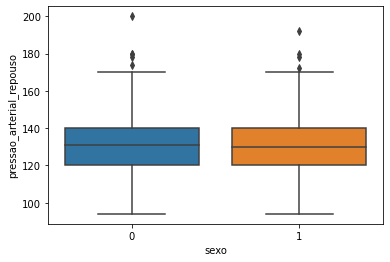

In [72]:
ax = sns.boxplot(x="sexo", y="pressao_arterial_repouso", data=heart_df)

In [73]:
#filtar valores discrepantes na coluna pressao_arterial_repouso

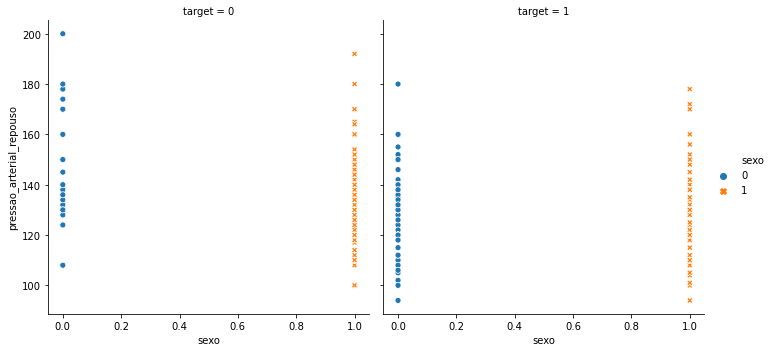

In [84]:
sns.relplot(
    data=heart_df,
    x="sexo", y="pressao_arterial_repouso", col="target",
    hue="sexo", style="sexo")

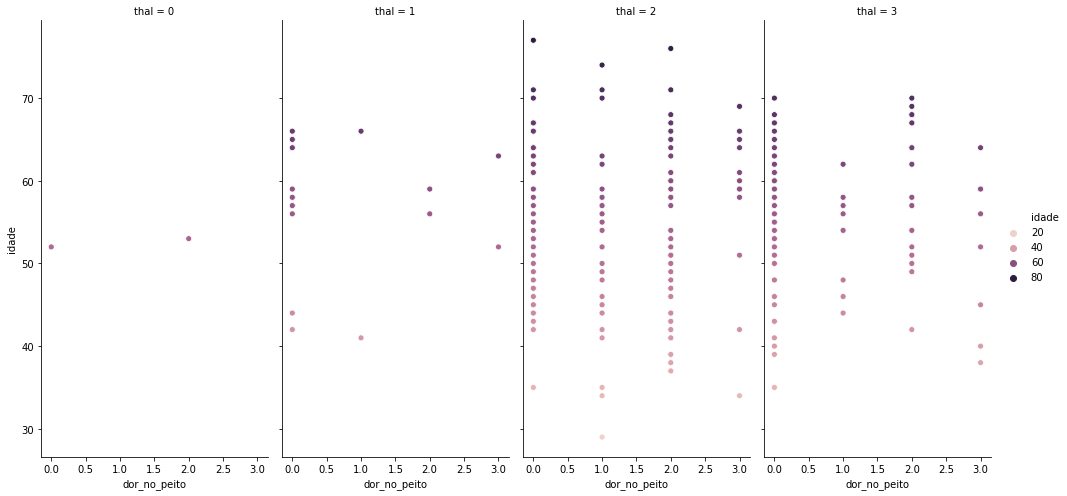

In [106]:
sns.relplot(
    data=heart_df, kind="scatter",
    x="dor_no_peito", y="idade", col="thal",
    hue="idade", height=7, aspect=.5)

In [ ]:
#dor no peito aumenta conforme a idade, diretamente proporcional ao thal